In [16]:
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [29]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [30]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

# For the "Median value of owner-occupied homes" provide a boxplot

<AxesSubplot:xlabel='MEDV'>

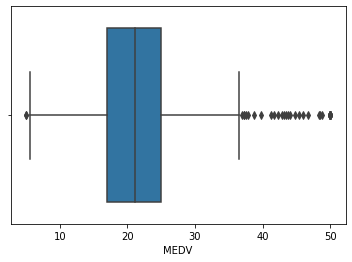

In [31]:
sns.boxplot(x='MEDV', data=boston_df)

# Provide a  bar plot for the Charles river variable

<BarContainer object of 2 artists>

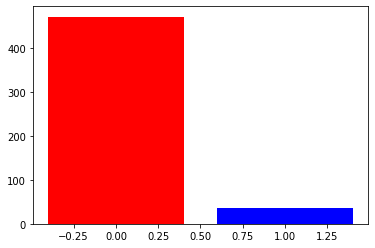

In [33]:
plt.bar(boston_df['CHAS'].unique(),boston_df['CHAS'].value_counts(sort=False),color=['red','blue'])

# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

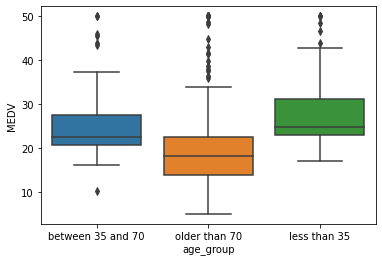

In [34]:
boston_df.loc[boston_df['AGE']<=35,'age_group'] = "less than 35"
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age_group'] = "between 35 and 70"
boston_df.loc[boston_df['AGE']>=70,'age_group'] = "older than 70"
sns.boxplot(x='age_group', y='MEDV', data=boston_df)

# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

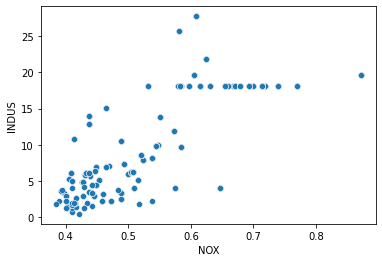

In [36]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

# Create a histogram for the pupil to teacher ratio variable

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

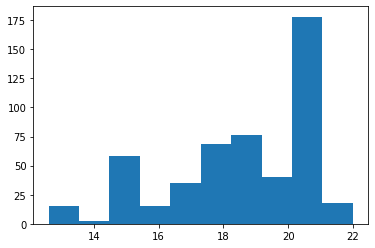

In [37]:
plt.hist(boston_df['PTRATIO'])

# Is there a significant difference in median value of houses bounded by the Charles river or not? 

Hypotheses:

*   $H\_0 (null):$ There is no significant difference in median value of houses whether bounded by Charles river or not
*   $H\_1:$ There is significant difference in median value of houses if they are bounded by Charles river


In [5]:

#In order to run t-test for independence of samples, we first check equality of variance
res = scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],
                        boston_df[boston_df['CHAS']==1]['MEDV'])
print("levene's test p-value=",res.pvalue)
#p value is less than 0.05 -> t-test for similarity of distribution cannot be used
#using Welch's t-test for independence of mean
res_ttest=scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                     boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=False)
print("ttest p-value=", res_ttest.pvalue)
#As the p-value is smaller than 0.05, we reject the null hypothesis that mu1=mu2 and state that
# there is significant difference in median value of houses bounded by the Charles river or not

levene's test p-value= 0.03263097600633006
ttest p-value= 0.003567170098137517


As the p-value is smaller than 0.05, we reject the null hypothesis and state that
there is significant difference in median value of houses depending upon whether they are bounded by the Charles river or not

#    Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypotheses:

*   $H\_0:$ There is no significant difference in median value of houses based on AGE
*   $H\_1:$ There is significant difference in median value of houses based on AGE

In [7]:
res=scipy.stats.levene(boston_df[boston_df['age_group']=="less than 35"]['MEDV'],
                  boston_df[boston_df['age_group']=="between 35 and 70"]['MEDV'],
                  boston_df[boston_df['age_group']=="older than 70"]['MEDV'])
print("levene's test pvalue=",res.pvalue)
# as p value is larger than 0.05, we assume that the variance of all the three variables are same
# thus, f-test cannot be used to answer the question

levene's test pvalue= 0.031806778061338456


In [9]:
#using kruskal test to check if the sample means are significantly different from each other
f_statistic, p_value = scipy.stats.kruskal(boston_df[boston_df['age_group']=="less than 35"]['MEDV'],
                                            boston_df[boston_df['age_group']=="between 35 and 70"]['MEDV'], 
                                            boston_df[boston_df['age_group']=="older than 70"]['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 121.60507259799651, P-Value: 3.924587349574227e-27


as the p-value is lower than 0.05, we reject the null hypothesis and state that there is significant difference in mean of median house values for each AGE group

#    Can we conclude that there is no relationship between Nitric oxide concentrations  and proportion of non-retail business acres per town? (Pearson Correlation)
hypotheses:

*   $H\_0:$ Nitric oxide concentration is not correlated with non-retail business acres per town
*   $H\_1:$ Nitric oxide concentration is correlated with non-retail business acres per town


(0.7636514469209151, 7.913361061238693e-98)

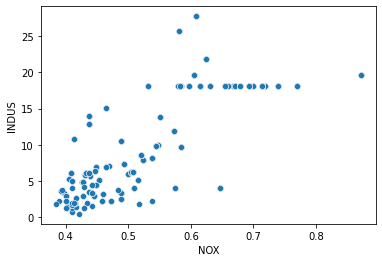

In [10]:
sns.scatterplot(x='NOX',y='INDUS', data=boston_df)
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

pvalue of pearsonr correlation is $p=7.9\times 1e^{-98}:$ .As pvalue is lower than 0.05, we reject the null hypothesis and state that there is correlation between NOX and INDUS

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

*   $H\_0:$ there is no impact of DIS on median value of owner occupied houses
*   $H\_1:$  there is impact of DIS on median value of owner occupied houses

(0.2499287340859039, 1.2066117273368017e-08)

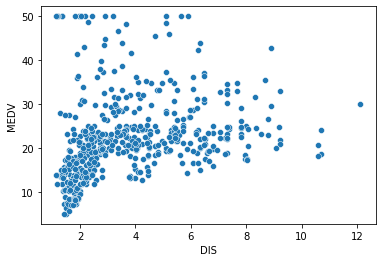

In [11]:

sns.scatterplot(x="DIS", y="MEDV", data=boston_df)
scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

In [22]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        23:44:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As p-value is lesser than 0.05, we conclude that there is impact of DIS on MEDV. The coefficient 1.0916 tells that for every single additional unit of DIS, there is 1.0916 increase in MEDV